# Réalisez une analyse de sentiments grâce au Deep Learning

## Data preprocessing

In [2]:
import pandas as pd
import re

# Chargement du fichier avec un encodage différent
df = pd.read_csv("../data/input/training.1600000.processed.noemoticon.utf-8.csv", 
                 header=None, 
                 names=["id", "timestamp", "date", "query", "user", "tweet"], 
                 )

# Vérification des premières lignes
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/input/training.1600000.processed.noemoticon.utf-8.csv'

In [2]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,id,timestamp,date,query,user,tweet


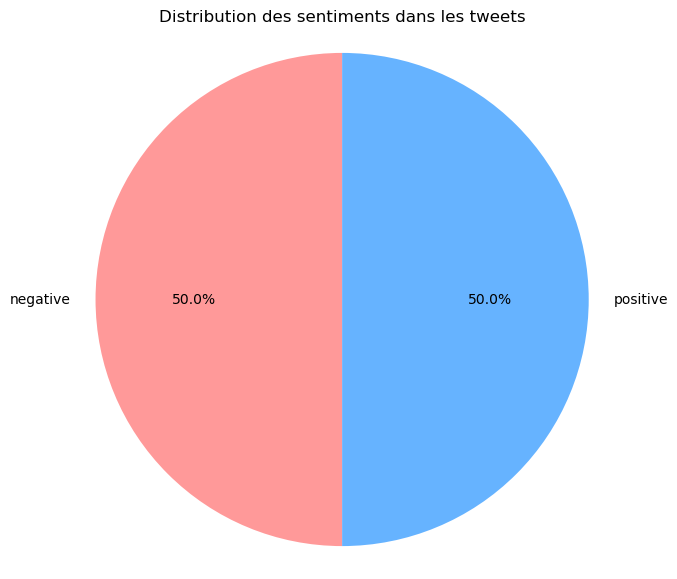

In [3]:
import matplotlib.pyplot as plt

# Distribution des labels dans la colonne 'id'
label_counts = df['id'].value_counts()

# Map des ids vers les labels
label_map = {0: 'negative', 4: 'positive', 2: 'neutral'}

# Remap des ids vers les labels
label_counts.index = label_counts.index.map(label_map)

# Création du graphique camembert
plt.figure(figsize=(7, 7))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Distribution des sentiments dans les tweets")
plt.axis('equal')  # Pour un cercle parfait
plt.show()


### Clean

In [4]:
# Supprimer les tweets vides (NaN ou chaînes vides)
df = df[~(df['tweet'].isna() | (df['tweet'] == ""))]

df['tweet'] = df['tweet'].str.lower()

# Suppression des URLs, mentions et hashtags
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))  # Supprimer les URLs
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'@\w+', '', x))  # Supprimer les mentions
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'#\w+', '', x))  # Supprimer les hashtags

df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Supprimer la ponctuation
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'\s+', ' ', x))  # Supprimer les espaces multiples
df['tweet'] = df['tweet'].apply(lambda x: x.strip())  # Supprimer les espaces en début et fin de chaîne

### Tokensisation

In [5]:
import nltk
from nltk.tokenize import word_tokenize

# Télécharger les ressources nécessaires (uniquement la première fois)
nltk.download('punkt')

# Tokeniser les tweets
df['tweet_tokenized'] = df['tweet'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /home/bruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Si tes tweets sont en français

# Filtrer les stopwords
df['tweet_tokenized'] = df['tweet_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to /home/bruno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df.to_csv("./output/data_clean.csv", index=False)